# Symbulate Documentation: Probability Spaces

<a id='contents'></a>

1. [**Introduction and installing Symbulate**](index.html)
1. [**Probability spaces**](#probspace)
  1. [**BoxModel:**](#boxmodel) Define a simple box model probability space.
  1. [**Draw:**](#draw) Draw an outcome according to a probability model.
  1. [**ProbabilitySpace:**](#probability_space) Define more general probability spaces.
  1. [**Independent spaces:**](#indep) Combine independent probability spaces.
1. [**Simulation tools**](sim.html)
1. [**Random variables**](rv.html)
1. [**Commonly used probability models**](common.html)
1. [**Multiple random variables and joint distributions**](joint.html)
1. [**Conditioning**](conditioning.html)
1. [**Random processes**](process.html)
1. [**Markov processes**](mc.html)

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html).  During a session, be sure to import Symbulate using the following commands.
<a id='prob'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='probspace'></a>
[Back to contents](#contents)

## Probability Spaces

A probability space consists of a sample space of possible outcomes and a probability measure which specifies how to assign probabilities to related events.  Several common probability models are available in Symbulate.  Users can also define their own probability spaces.

<a id='boxmodel'></a>
[Back to contents](#contents)

### BoxModel

The box model representation can be used for many probability models.  Enter a list repesenting the tickets in the box.  For example, rolling a fair six-sided die could be represented as a box model with six tickets labeled 1 through 6.

In [2]:
die = [1, 2, 3, 4, 5, 6]
roll = BoxModel(die)

The list of numbers could also have been created using `range()` in Python. Remember that Python indexing starts from 0 by default. Remember also that `range` gives you all the values, up to, but *not including* the last value.

In [3]:
die = list(range(1, 6+1)) # this is just a list of the number 1 through 6
roll = BoxModel(die)

<a id='draw'></a>
[Back to contents](#contents)

### Draw

BoxModel itself just defines the model; it does return any values.  (The same is true for any probability space.) The `.draw()` method can be used to simulate one draw from the BoxModel (or any probability space).

In [4]:
roll.draw()

1

### BoxModel options
* `box`: A list of "tickets" to sample from.
* `size`: How many tickets to draw from the box.
* `replace`: `True` if the draws are made with replacement; `False` if without replacement
* `probs`: Probabilities that the tickets are selected.  By default, all tickets are equally likely.
* `order_matters`: `True` if different orderings of the same tickets drawn are counted as different outcomes; `False` if the order in which the tickets are drawn is irrelevant.

Multiple tickets can be drawn from the box using the **size** argument.

In [5]:
BoxModel(die, size = 3).draw()

(6, 3, 6)

BoxModel by default assumes equally likely tickets.  This can be changed using the **probs** argument, by specifying a probability value for each ticket.

*Example.* Suppose 32% of Americans are Democrats, 27% are Republican, and 41% are Independent.  Five randomly selected Americans are surveyed about their political party affiliation.

This situation could be represented as sampling with replacement from a box with 100 tickets, 32 of which are Democrat, etc, from which 5 tickets are drawn.  But rather than specifying a list of 100 tickets, we can just specify the three tickets and the corresponding probabilities with `probs`.  

In [6]:
BoxModel(['D','R','I'], probs = [0.32, 0.27, 0.41], size = 5).draw()

('R', 'D', 'I', 'I', 'I')

BoxModel by default assumes sampling with replacement; each ticket is placed back in the box before the next ticket is selected.  Sampling *without replacement* can be handled with `replace = False`.  (The default is `replace = True`.)

*Example.*  Two people are selected at random from Anakin, Bella, Frodo, Harry, Katniss to go on a quest.

In [7]:
BoxModel(['A','B','F','H','K'], size = 2, replace = False).draw()

('B', 'H')

Note that by default, BoxModel returns ordered outcomes, e.g. ('A', 'B') is distinct from ('B', 'A'). To return unordered outcomes, set `order_matters=False`.

<a id='probability_space'></a>
[Back to contents](#contents)

### ProbabilitySpace

Symbulate has many [common probability models](common.html) built in.  **ProbabilitySpace** allows for user defined probability models.  The first step in creating a probability space is to define a function that explains how to draw one outcome. 

*Example.* Ten percent of all e-mail is spam. Thirty percent of spam e-mails contain the word "money", while 2% of non-spam e-mails contain the word "money". Suppose an e-mail contains the word "money". What is the probability that it is spam?

We can think of the sample space of outcomes of pairs of the possible email types (spam or not) and wordings (money or not), with the probability measure following the above specifications.  The function spam_sim below encodes these specifications; note the use of .draw().

In [8]:
def spam_sim():
    email_type = BoxModel(["spam", "not spam"], probs=[.1, .9]).draw()
    if email_type == "spam":
        has_money = BoxModel(["money", "no money"], probs=[.3, .7]).draw()
    else:
        has_money = BoxModel(["money", "no money"], probs=[.02, .98]).draw()
    return email_type, has_money

A probability space can be created once the specifications of the simulation have been defined through a function.

In [9]:
P = ProbabilitySpace(spam_sim)
P.draw()

('not spam', 'no money')

### Commonly used probability spaces

Symbulate has many [commonly used probability spaces](common.html) built in.  Here are just a few examples.  

In [10]:
Binomial(n = 10, p = 0.5).draw()

7

In [11]:
Normal(mean = 0, sd = 1).draw()

1.0428492530350442

In [12]:
mean_vector = [0, 1, 2]
cov_matrix = [[1.00, 0.50, 0.25],
              [0.50, 2.00, 0.00],
              [0.25, 0.00, 4.00]]

MultivariateNormal(mean = mean_vector, cov = cov_matrix).draw()

(-0.78618951770039402, -0.22737967139063997, 4.3562967784250919)

<a id='indep'></a>
[Back to contents](#contents)

### Independent probability spaces

**Independent** probability spaces can be constructed by multiplying (`*` in Python) two probability spaces. Multiple independent copies of a probability space can be created by raising a probability space to a power (`**` in Python).

*Example.*  Roll a fair six-sided die and a fair four-sided die.

In [13]:
die6 = list(range(1, 6+1, 1))
die4 = list(range(1, 4+1, 1))
rolls = BoxModel(die6) * BoxModel(die4)
rolls.draw()

(4, 1)

*Example.* A triple of independent outcomes

In [14]:
(BoxModel(['H', 'T']) * Poisson(lam = 2) * Exponential(rate = 5)).draw()

('H', 0, 0.245185652333073)

*Example.* Four independent N(0,1) values.

In [15]:
P = Normal(mean = 0, var =1) ** 4
P.draw()

(1.2577134058159847,
 0.21097953140173498,
 0.043599224847710775,
 -0.0691374209558197)

Infinite independent copies of a probability space can be created by raising a probability space to inf (`** inf` in Python).

*Example*. Random processes are often defined incrementally. The following code defines the random process X . The probability space corresponds to the independent Bernoulli random variables; note that inf allows for infinitely many values. Also notice how the process is defined incrementally through $X_{n+1} = X_n + Z_{n+1}$.

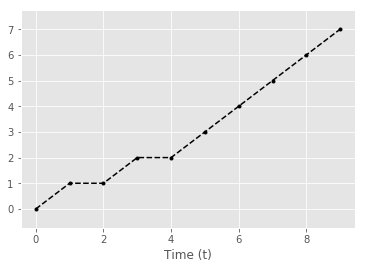

In [16]:
P = Bernoulli(0.5)**inf
Z = RV(P)
X = RandomProcess(P, TimeIndex(fs=1))

X[0] =  0
for n in range(100):
    X[n+1] = X[n] + Z[n+1]

X.sim(1).plot(alpha = 1)

<a id='simulation'></a>
[Back to contents](#contents)